## Final Project Submission

Please fill out:
* Student name:  Kennedy Murithi
* Student pace: self paced / part time / full time   A part time student
* Scheduled project review date/time: 
* Instructor name: Samuel Jane
* Blog post URL:


### Bussiness Problem

### Objectives

You will be able to:

*Be able to identify the features with strong relationship with the Housing prices.

*Perform a train-test split

*Prepare training and testing data for modeling

*Compare training and testing errors to determine if model is over or underfitting

In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
data = pd.read_csv("kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [3]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
data.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

In [6]:
# we change the date type from object to datetime
data['date']= pd.to_datetime(data['date'])

In [7]:
 ## we go on to drop the columns that we will not be using
data.drop(['date','id','sqft_living','bathrooms','long','lat','zipcode','sqft_basement'
           ,'sqft_lot','condition','waterfront', 'sqft_above'], axis= 1,inplace= True)

In [8]:
data.columns

Index(['price', 'bedrooms', 'floors', 'view', 'grade', 'yr_built',
       'yr_renovated', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
data.shape

(21597, 9)

In [10]:
data.head()

,price,bedrooms,floors,view,grade,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.0,0.0,7,1955,0.0,1340,5650
1,538000.0,3,2.0,0.0,7,1951,1991.0,1690,7639
2,180000.0,2,1.0,0.0,6,1933,NaN,2720,8062
3,604000.0,4,1.0,0.0,7,1965,0.0,1360,5000
4,510000.0,3,1.0,0.0,8,1987,0.0,1800,7503


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

#quickly explore the distribution and pairwise correlations between our features
#pd.plotting.scatter_matrix(new_data);


In [12]:
data.isna().sum()

price               0
bedrooms            0
floors              0
view               63
grade               0
yr_built            0
yr_renovated     3842
sqft_living15       0
sqft_lot15          0
dtype: int64

In [13]:
#Dropping the null entries in the view column
data.view.dropna(inplace=True)

In [14]:
# Filling in the null
data['yr_renovated'] = data['yr_renovated'].fillna(data['yr_renovated'].median())

In [15]:
# Checking for duplicated entries in the dataset
data.duplicated().sum()

23

In [16]:
# Investigating further due to the presence of duplicated values
data[data.duplicated(keep=False)]

,price,bedrooms,floors,view,grade,yr_built,yr_renovated,sqft_living15,sqft_lot15
547,259950.0,2,2.0,0.0,9,2008,0.0,1070,928
1231,208000.0,3,1.0,0.0,6,1960,0.0,1010,7420
2809,963990.0,4,2.0,0.0,9,2014,0.0,3830,6507
3946,550000.0,4,2.0,3.0,8,1936,1980.0,2520,14789
3947,550000.0,4,2.0,3.0,8,1936,1980.0,2520,14789
4348,259950.0,2,2.0,0.0,9,2008,0.0,1070,928
4965,568000.0,3,3.0,0.0,8,2008,0.0,1740,1280
6920,375000.0,3,3.0,0.0,8,2004,0.0,1330,1113
7644,510000.0,6,2.0,0.0,8,1980,0.0,2470,7561
8275,245000.0,2,1.0,0.0,6,1960,0.0,1220,1740


In [17]:
# Dropping the duplicates
data.drop_duplicates(inplace=True)

In [18]:
# Rechecking once again for any duplicated entries in the data
data[data.duplicated(keep=False)]

,price,bedrooms,floors,view,grade,yr_built,yr_renovated,sqft_living15,sqft_lot15


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21574 entries, 0 to 21596
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21574 non-null  float64
 1   bedrooms       21574 non-null  int64  
 2   floors         21574 non-null  float64
 3   view           21511 non-null  float64
 4   grade          21574 non-null  int64  
 5   yr_built       21574 non-null  int64  
 6   yr_renovated   21574 non-null  float64
 7   sqft_living15  21574 non-null  int64  
 8   sqft_lot15     21574 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 1.6 MB


In [20]:
import seaborn as sns;sns.set_theme(style='darkgrid')
import numpy as np

### Plotting histograms for our columns

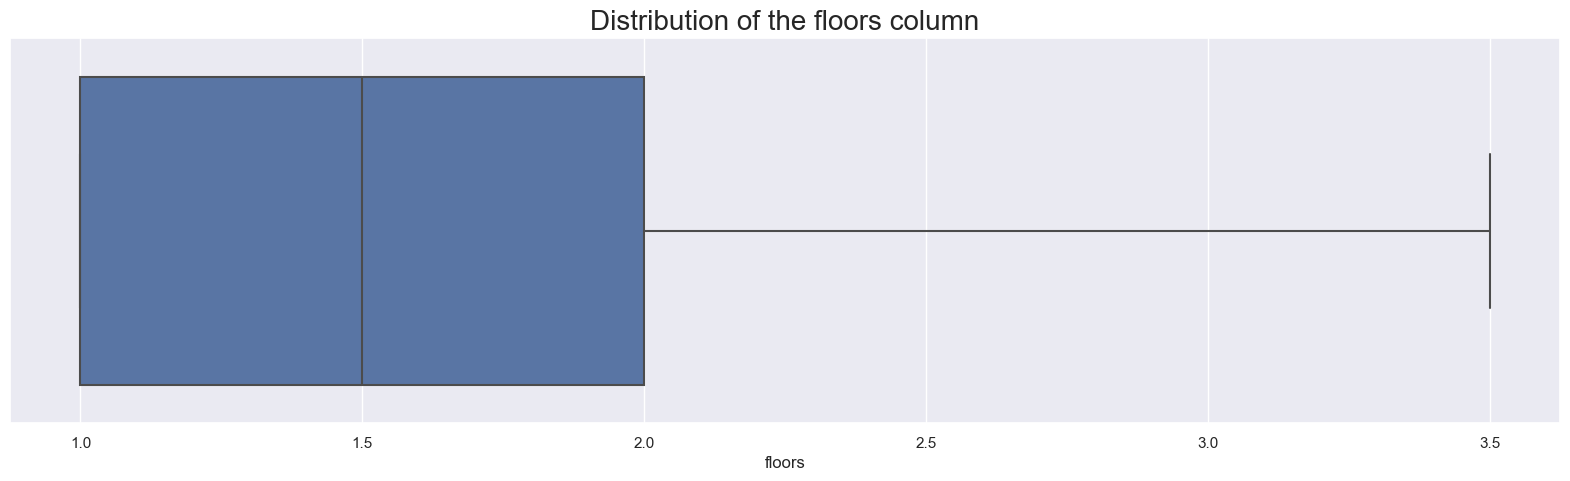

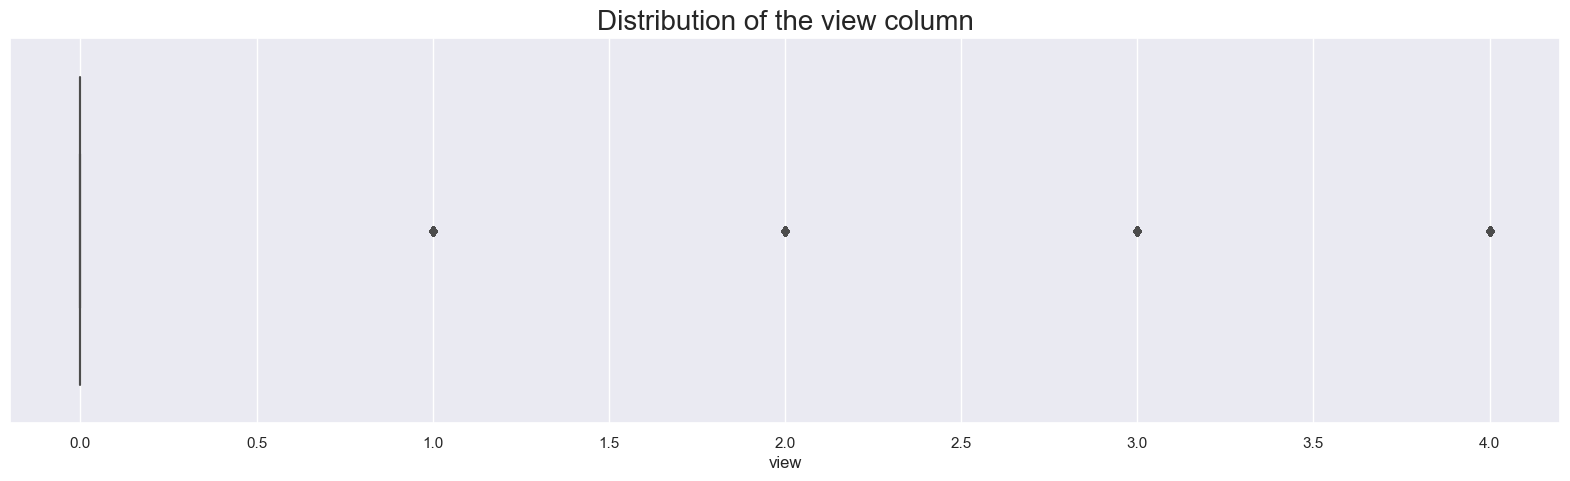

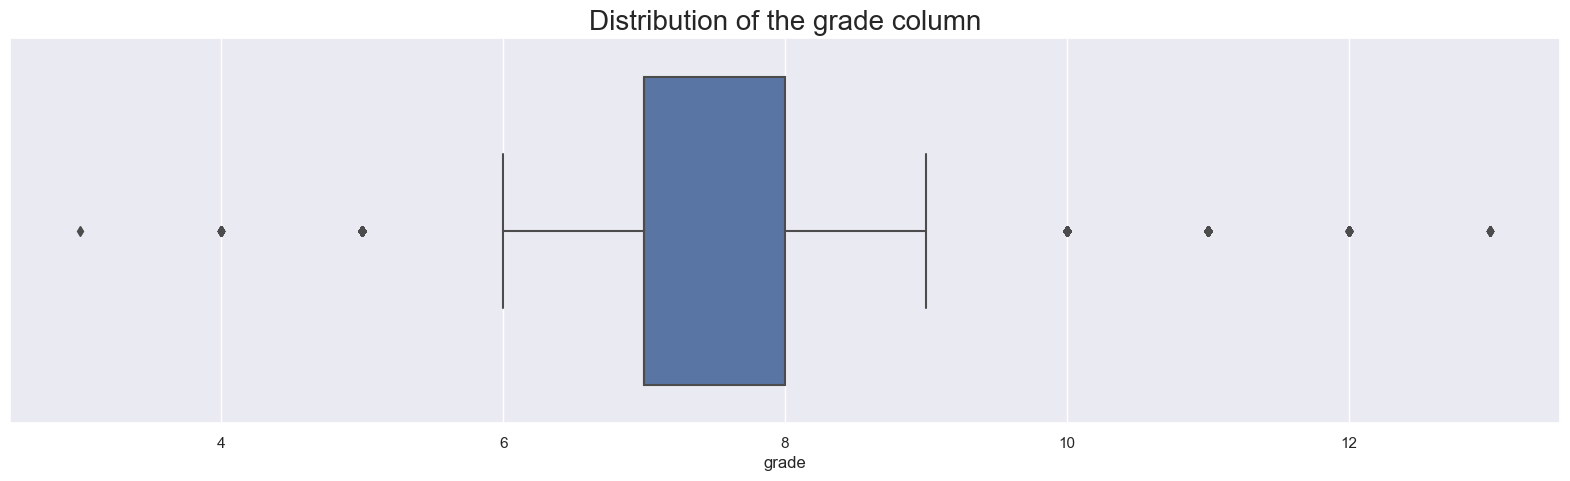

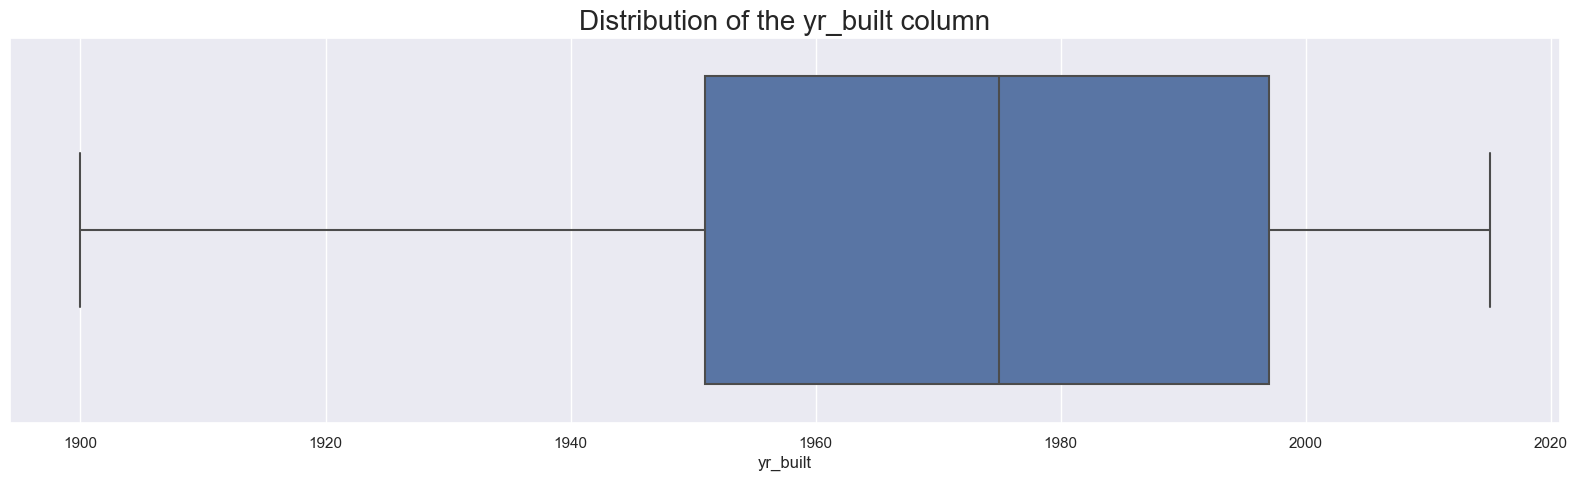

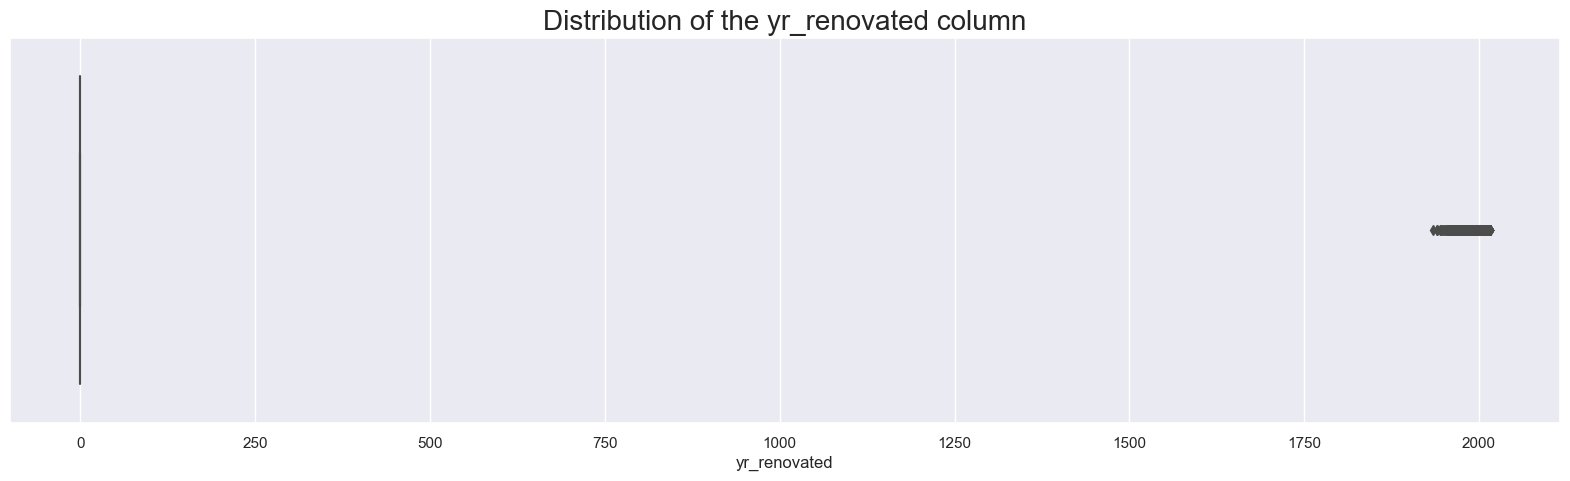

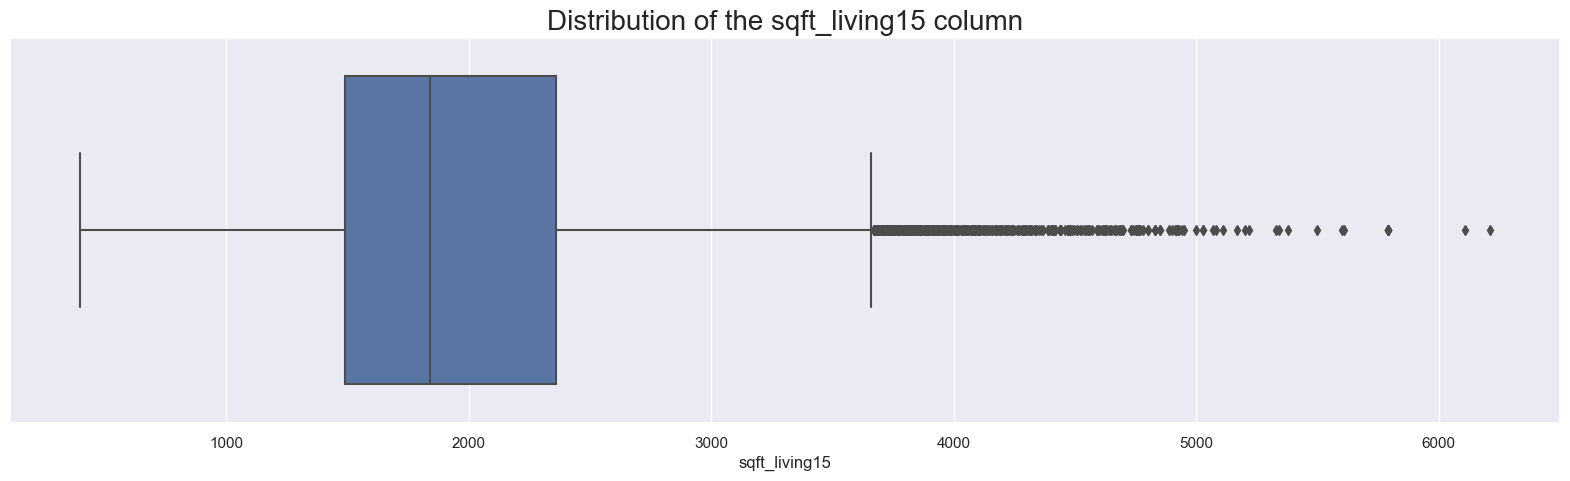

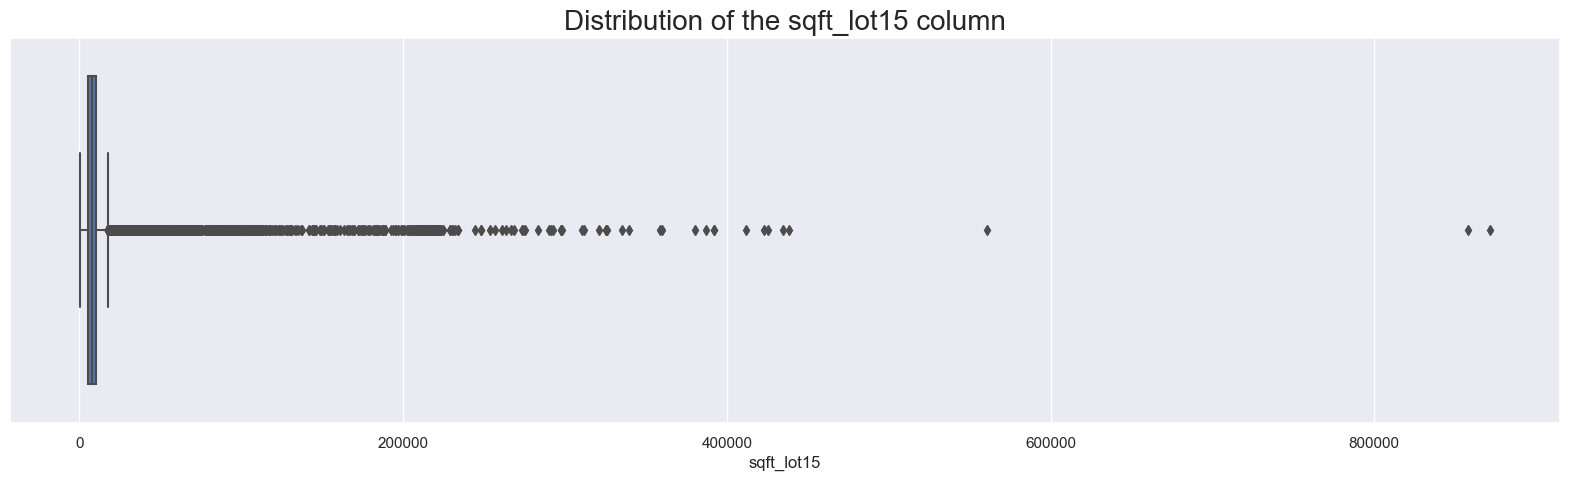

In [21]:
# we will use subplots to plot individual boxplots
#cols = ['floors','view','grade','yr_built','yr_renovated','sqft_living15','sqft_lot15']

df1 = data[['floors','view','grade','yr_built','yr_renovated','sqft_living15','sqft_lot15']]

# define subplot grid
for column in df1:
        plt.figure(figsize=(20,5))
        plt.title('Distribution of the ' + column+ ' column',fontsize=(20))
        sns.boxplot(data=df1, x=column)

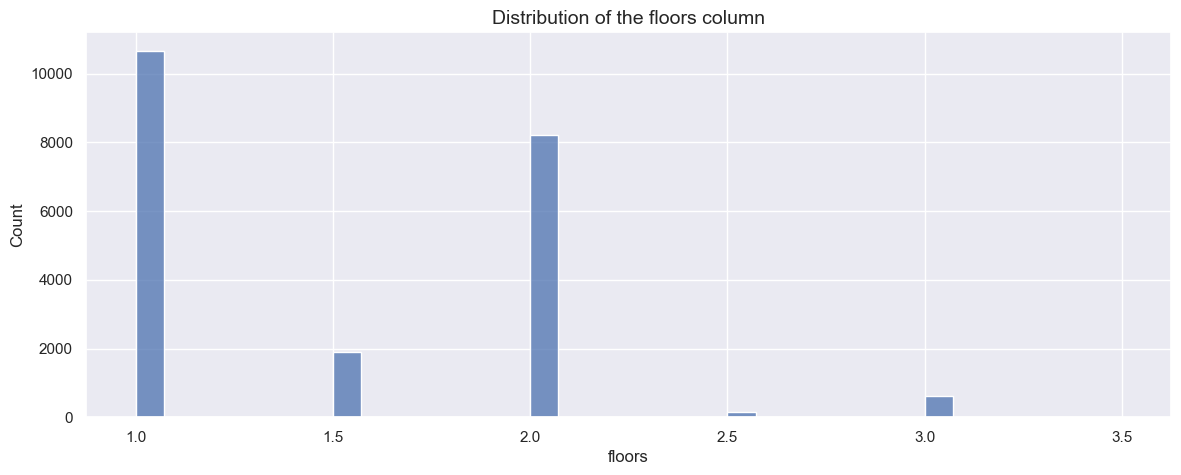

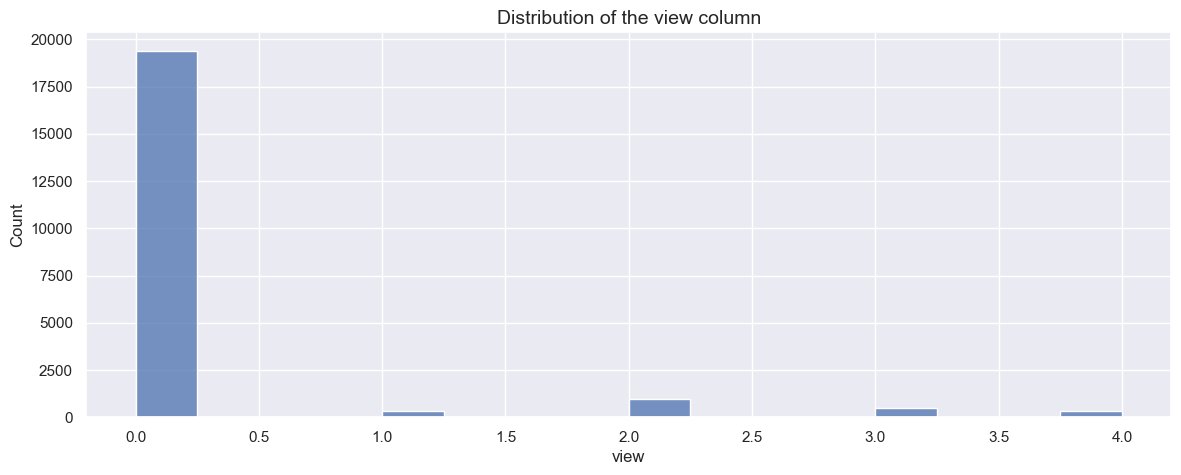

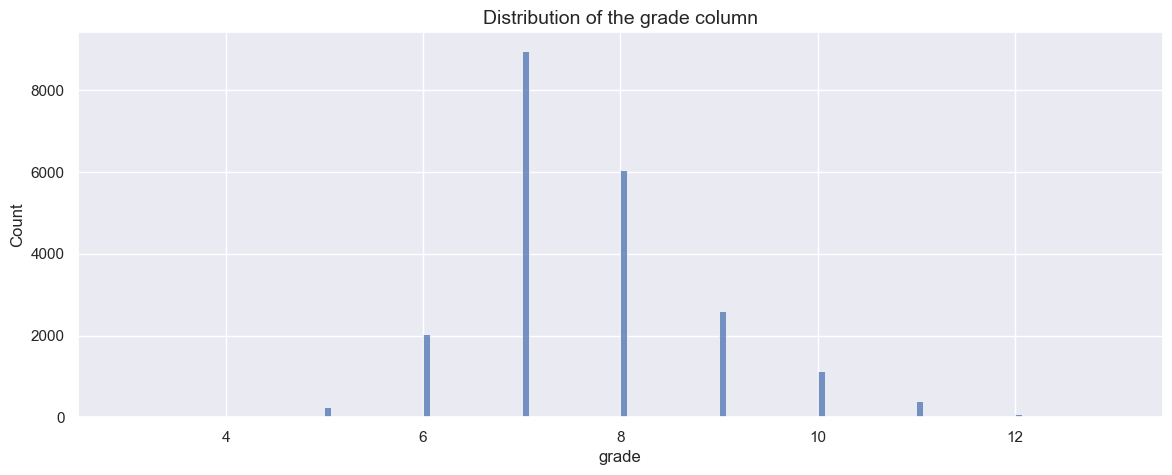

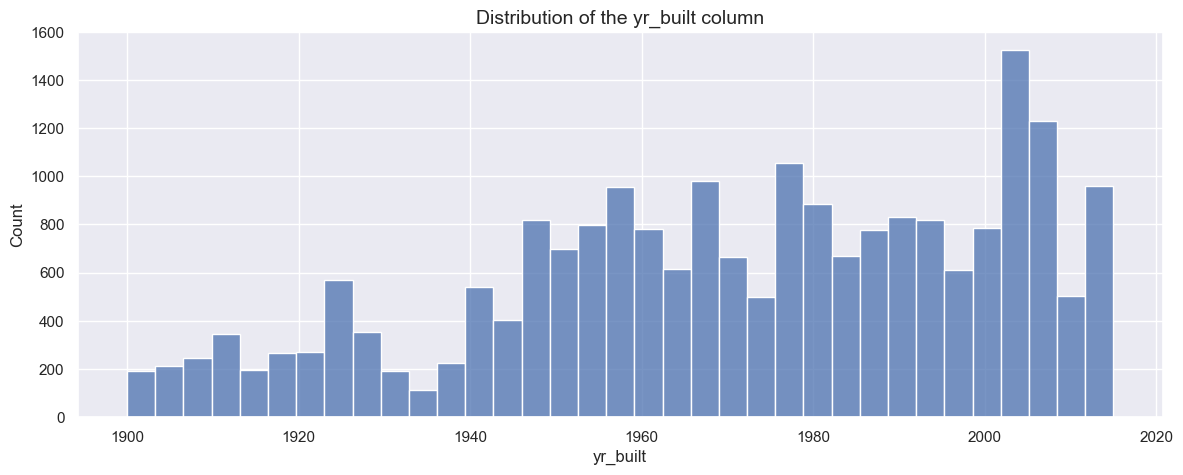

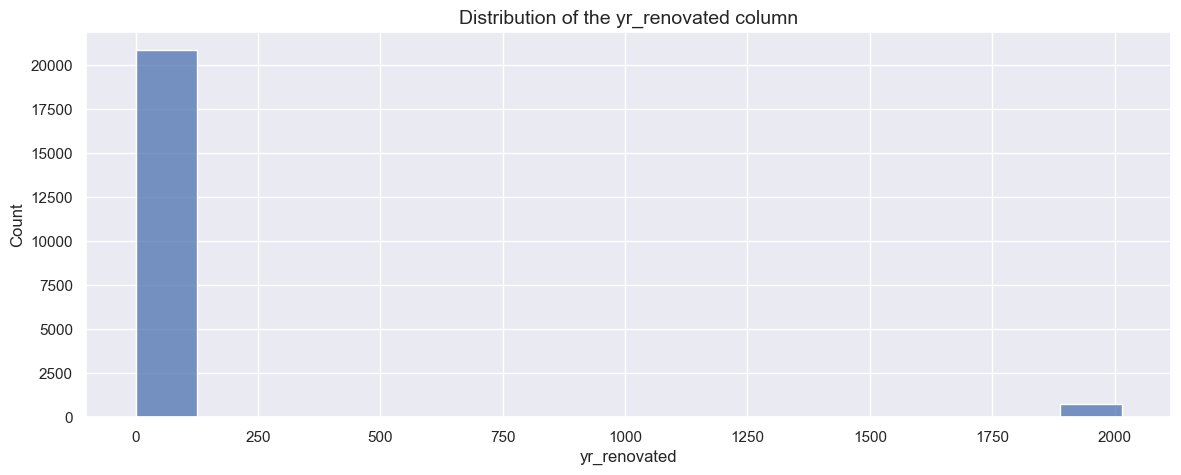

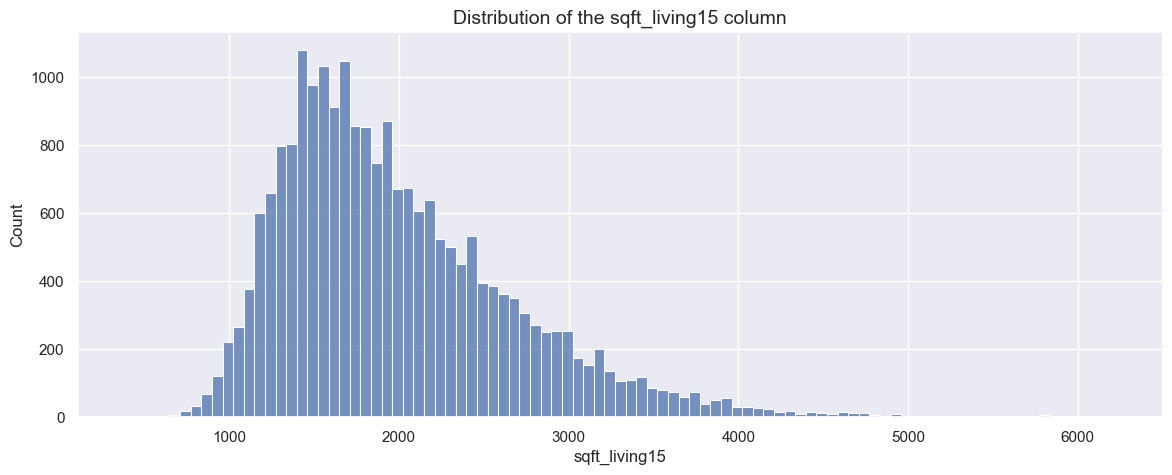

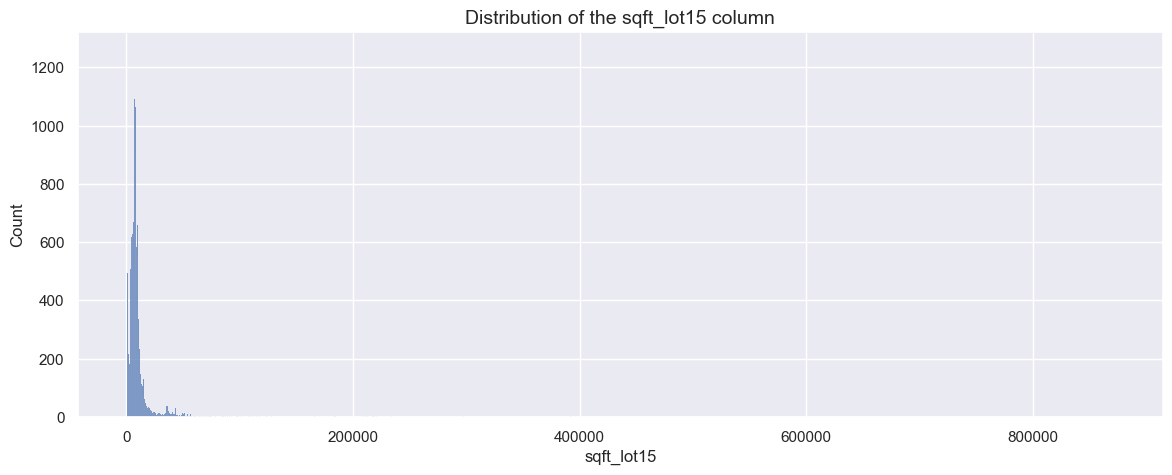

In [22]:
# Plotting histograms for our columns

for column in df1:
        plt.figure(figsize=(14,5))
        plt.title('Distribution of the ' + column+ ' column',fontsize=(14))
        sns.histplot(data=df1, x=column)

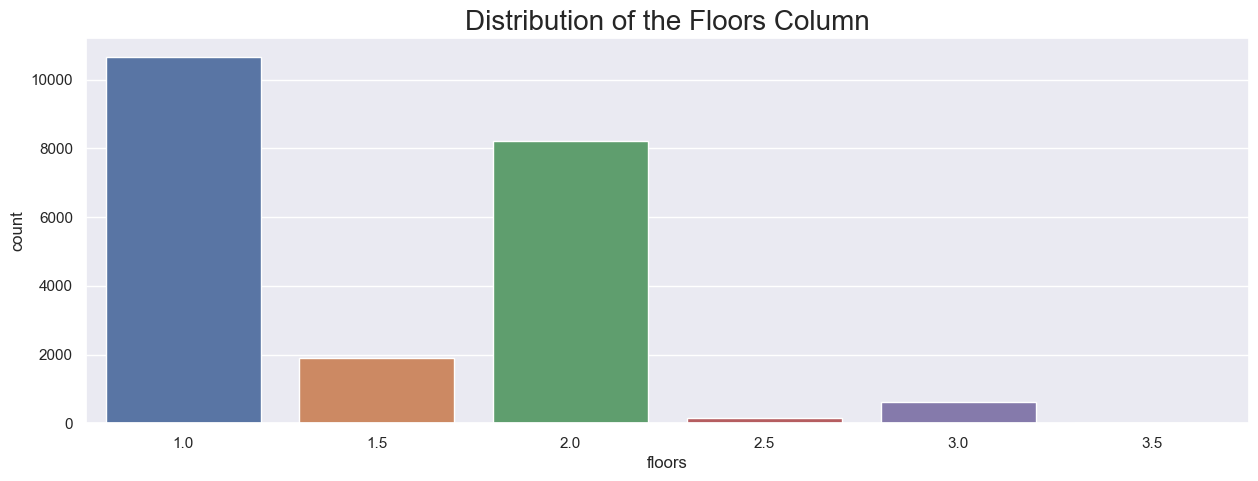

In [23]:
# Plotting the Distibution of the Genres
plt.figure(figsize=(15,5))
plt.title('Distribution of the Floors Column',fontsize=(20))
sns.countplot(data=data,x='floors');

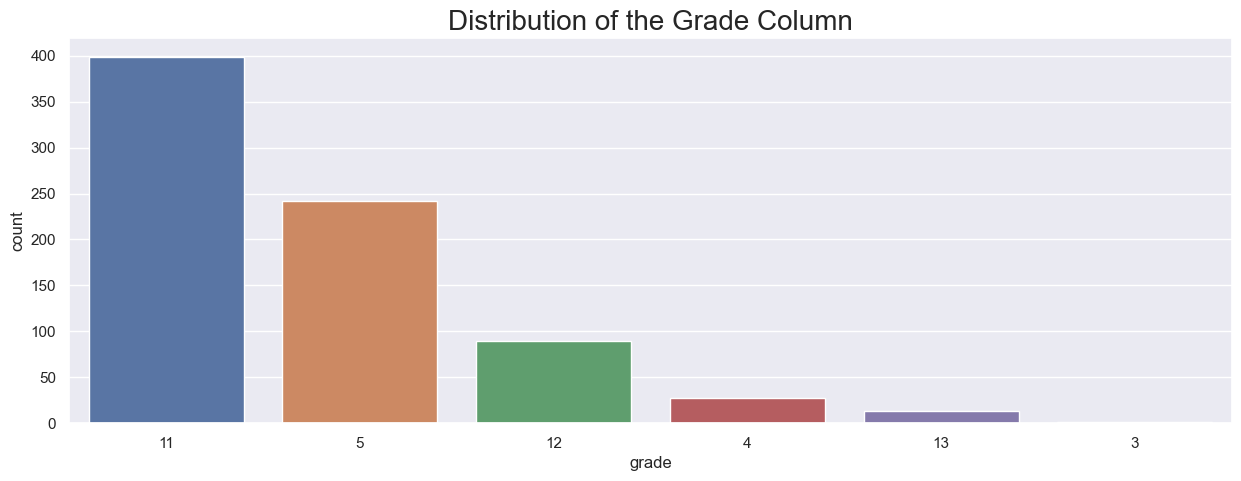

In [24]:
# Instead you can, and should, plot the top 10. 
# Even in this instance alot of the values are overlapping, what you should do is flip the plot. 
plt.figure(figsize=(15,5))
plt.title('Distribution of the Grade Column',fontsize=(20))
sns.countplot(x='grade',data=data,order=pd.value_counts(data['grade']).iloc[5:].index);

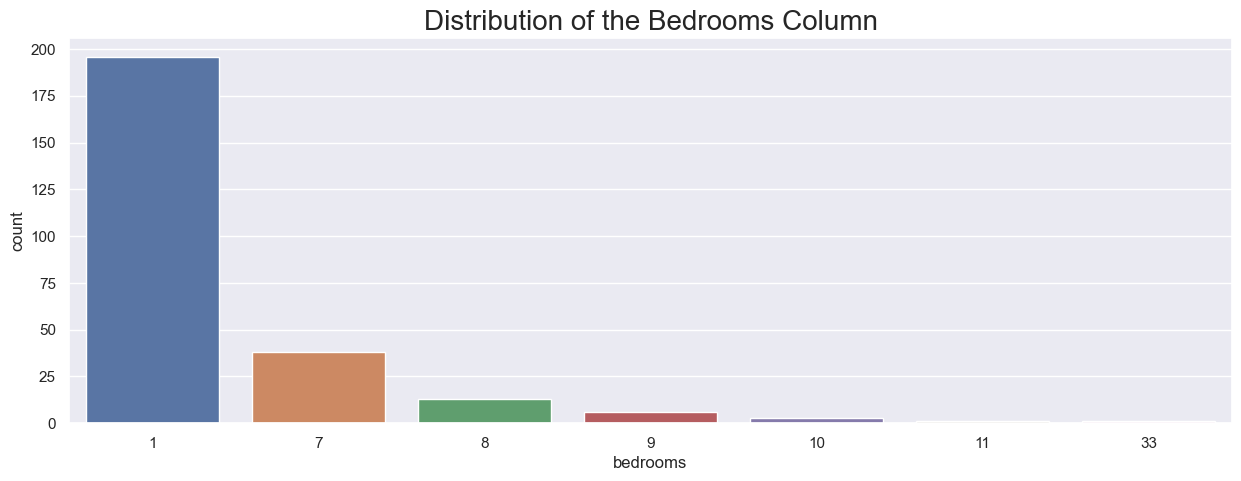

In [25]:
# Instead you can, and should, plot the top 10. 
# Even in this instance alot of the values are overlapping, what you should do is flip the plot. 
plt.figure(figsize=(15,5))
plt.title('Distribution of the Bedrooms Column',fontsize=(20))
sns.countplot(x='bedrooms',data=data,order=pd.value_counts(data['bedrooms']).iloc[5:].index);


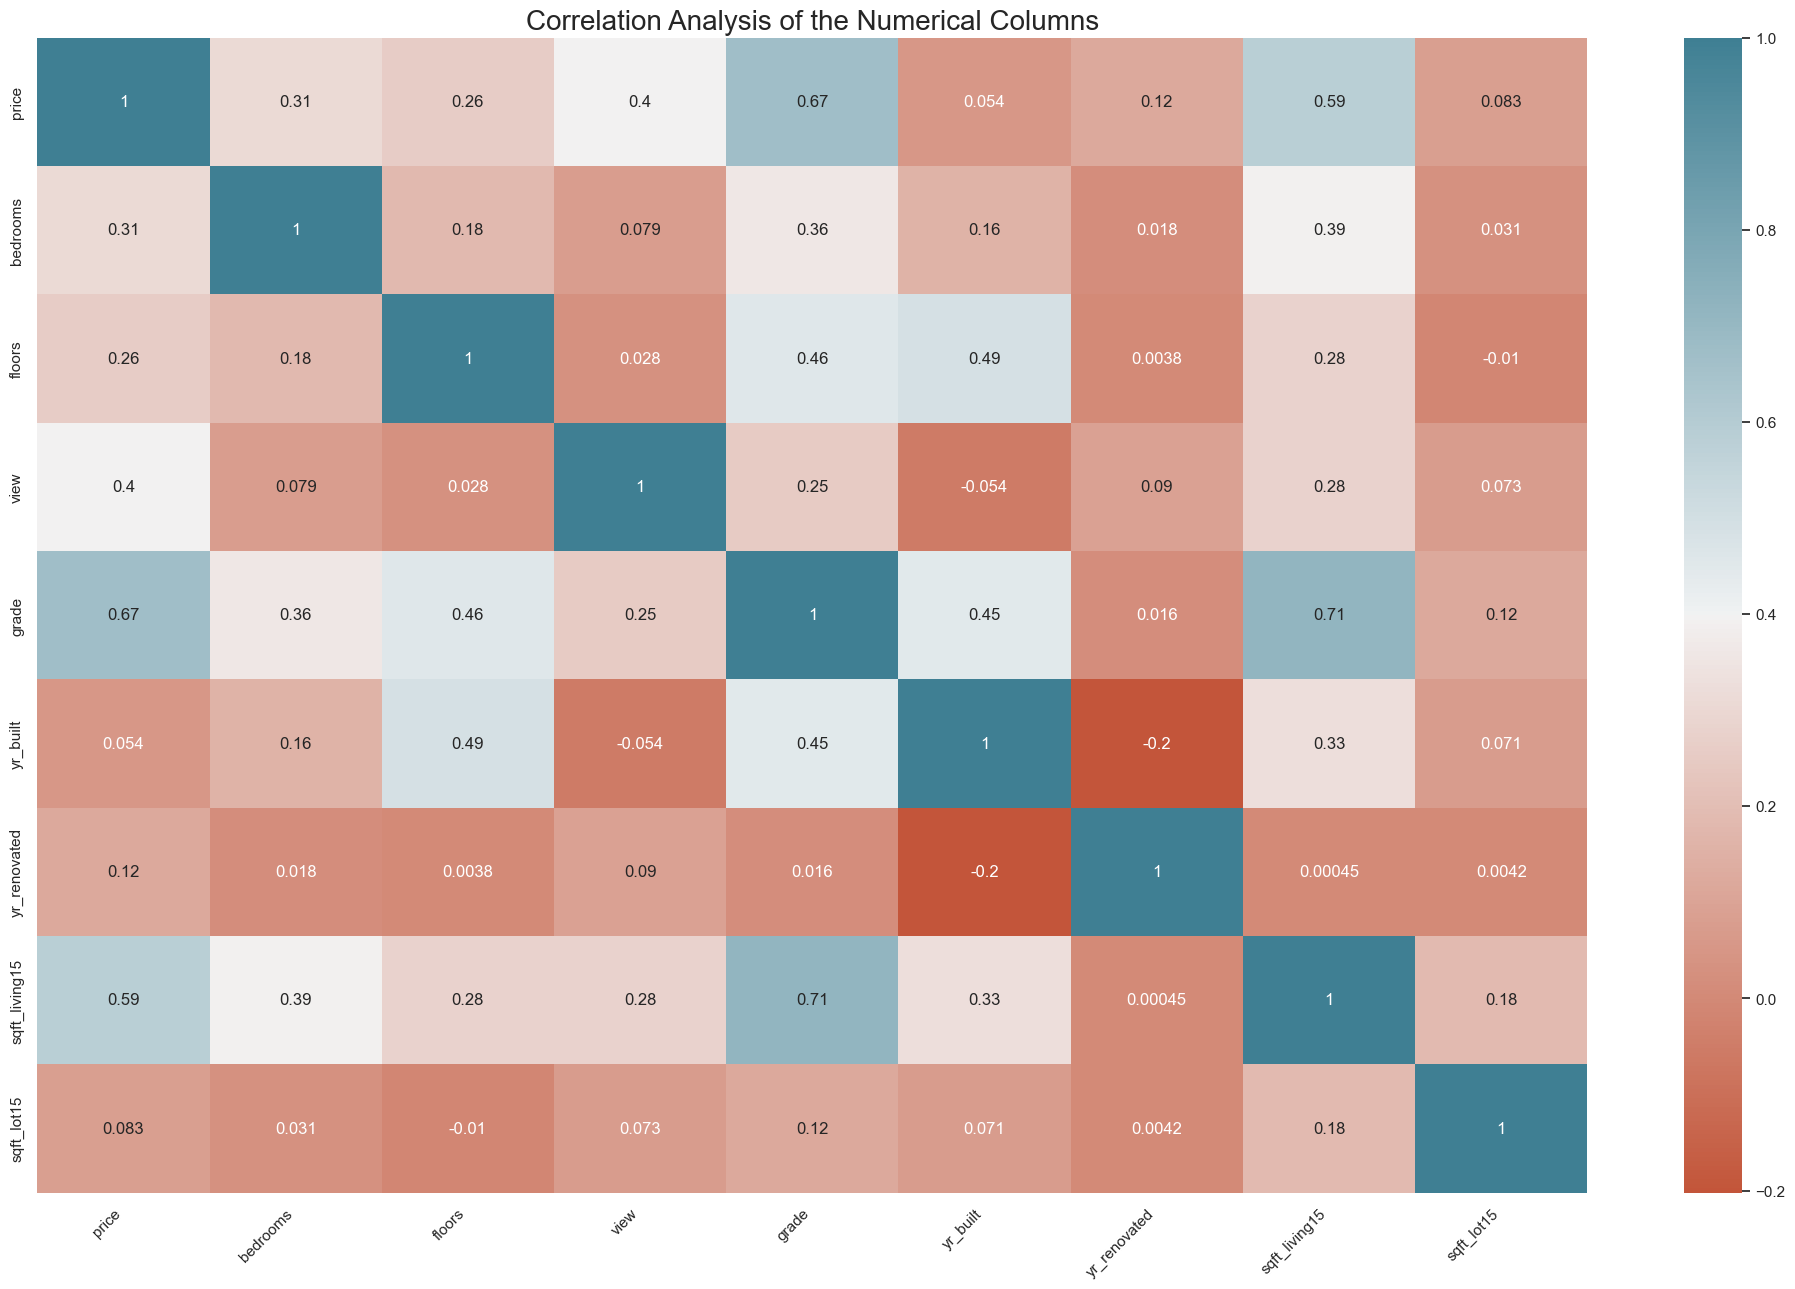

In [26]:
## Correlation Analysis 

plt.figure(figsize = (25,15))
plt.title('Correlation Analysis of the Numerical Columns',fontsize=20)
ax = sns.heatmap(data.corr(),cmap=sns.diverging_palette(20, 220, n=256), annot = True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');
plt.show()

### Checking for Outliers

In [27]:
summary=data.describe()
outliers = data[data['price'] > summary.loc['75%', 'price'] + 1.5 * (summary.loc['75%', 'price'] - summary.loc['25%','price'])]
outliers

,price,bedrooms,floors,view,grade,yr_built,yr_renovated,sqft_living15,sqft_lot15
5,1230000.0,4,1.0,0.0,11,2001,0.0,4760,101930
21,2000000.0,3,1.0,4.0,9,1968,0.0,4110,20336
49,1350000.0,3,1.0,2.0,9,1953,0.0,2680,72513
69,1330000.0,5,1.0,0.0,8,1965,0.0,3390,20158
125,1450000.0,4,1.5,0.0,8,1914,1992.0,3060,11275
...,...,...,...,...,...,...,...,...,...
21552,1700000.0,4,2.0,0.0,10,2014,0.0,2190,10777
21560,3570000.0,5,2.0,4.0,10,2007,0.0,3470,18270
21574,1220000.0,4,1.5,0.0,11,2007,0.0,4560,11063
21581,1580000.0,4,2.0,0.0,10,2007,0.0,2290,10125


In [28]:
## We create a function that takes in a dataset with its given columns to remove the outliers for us.
def remove_outliers(df, col_names):
    q1 = df[col_names].quantile(0.25)
    q3 = df[col_names].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df_filtered = df[(df[col_names] > lower_bound) & (df[col_names] < upper_bound)]
    return df_filtered

In [29]:
new_data = remove_outliers(data,['price','grade','floors','yr_renovated','bedrooms','yr_built','sqft_living15','sqft_lot15'])
new_data

,price,bedrooms,floors,view,grade,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3.0,1.0,NaN,7.0,1955,NaN,1340.0,5650.0
1,538000.0,3.0,2.0,NaN,7.0,1951,NaN,1690.0,7639.0
2,180000.0,2.0,1.0,NaN,6.0,1933,NaN,2720.0,8062.0
3,604000.0,4.0,1.0,NaN,7.0,1965,NaN,1360.0,5000.0
4,510000.0,3.0,1.0,NaN,8.0,1987,NaN,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...
21592,360000.0,3.0,3.0,NaN,8.0,2009,NaN,1530.0,1509.0
21593,400000.0,4.0,2.0,NaN,8.0,2014,NaN,1830.0,7200.0
21594,402101.0,2.0,2.0,NaN,7.0,2009,NaN,1020.0,2007.0
21595,400000.0,3.0,2.0,NaN,8.0,2004,NaN,1410.0,1287.0


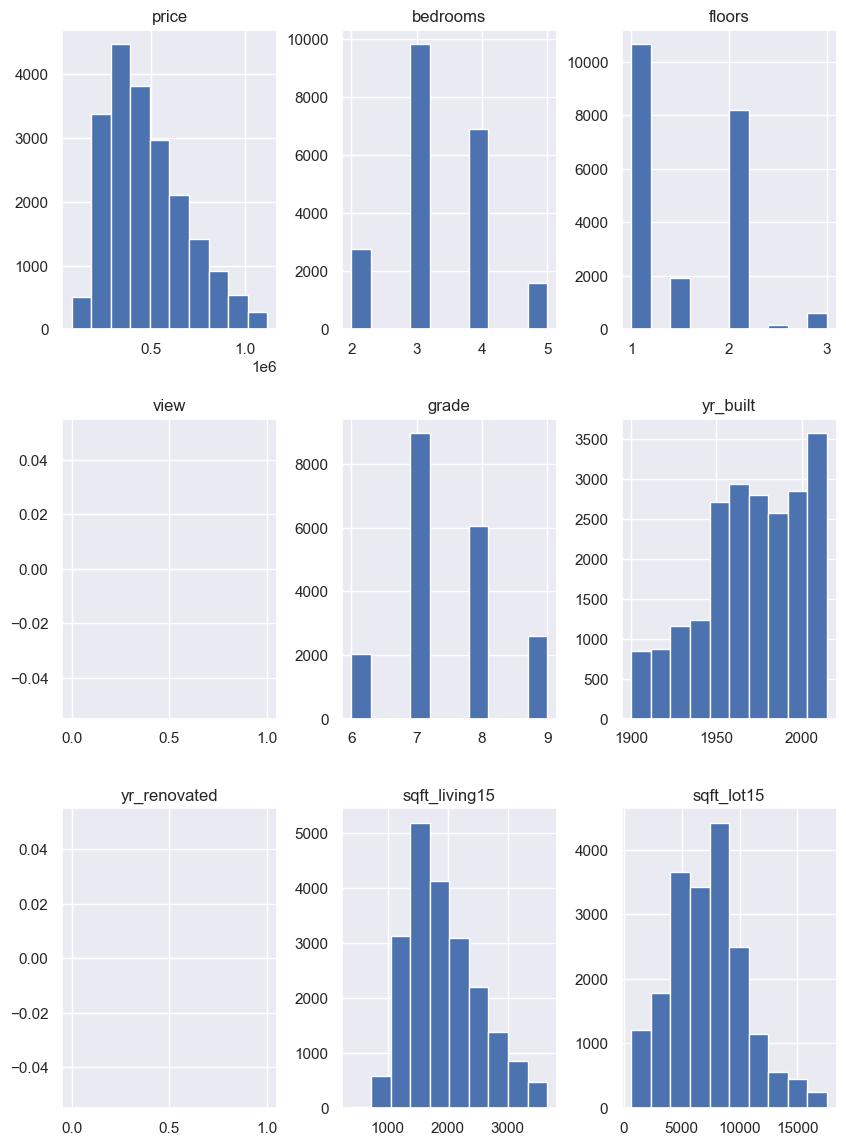

In [44]:
## using a histogram to identify categorical values 
import warnings
warnings.filterwarnings('ignore')
fig=plt.figure(figsize=(10,14))
ax=fig.gca()
new_data.hist(ax=ax);

In [45]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

The relationship is not linear.


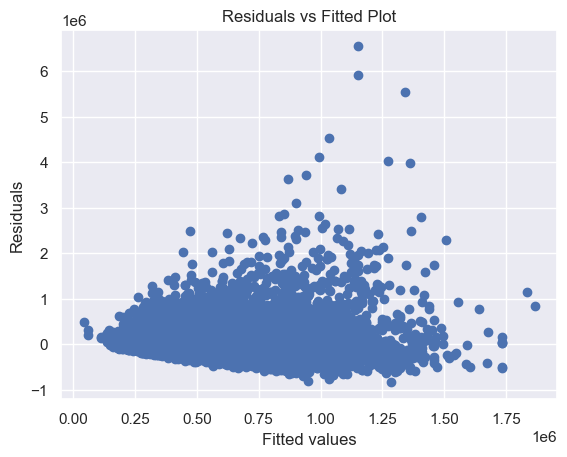

In [46]:
# Fit model
model = sm.OLS(data['price'], sm.add_constant(data['sqft_living15'])).fit()

# Create residual vs fitted plot
residuals = model.resid
fitted = model.fittedvalues
plt.scatter(fitted, residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Plot')
#plt.show()

# Check for linearity
if abs(residuals).max() < 0.05 * abs(fitted).max():
    print('The relationship is linear.')
else:
    print('The relationship is not linear.')

plt.show()

The relationship is not linear.


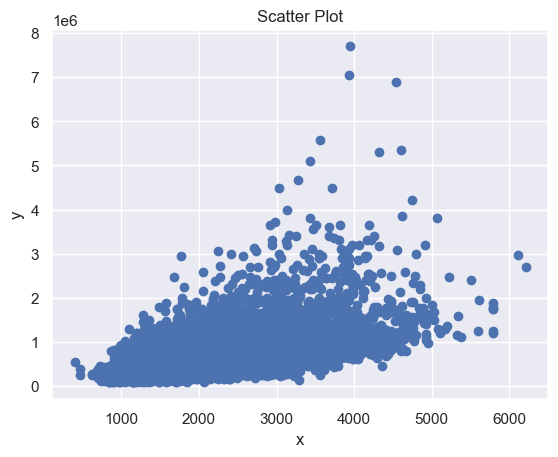

In [47]:
# Create scatter plot
plt.scatter(data['sqft_living15'], data['price'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot')
#plt.show()

# Check for linearity using a scatter plot 
if abs(data['price'].corr(data['sqft_living15'])) > 0.7:
    print('The relationship is linear.')
else:
    print('The relationship is not linear.')
    
plt.show()

In [48]:
f= 'price~sqft_living15'
model=ols(formula=f,data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                 1.123e+04
Date:                Mon, 27 Mar 2023   Prob (F-statistic):               0.00
Time:                        03:49:49   Log-Likelihood:            -3.0255e+05
No. Observations:               21574   AIC:                         6.051e+05
Df Residuals:                   21572   BIC:                         6.051e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -8.322e+04   6223.420    -13.372      0.000   -9.54e+04    -7.1e+04
sqft_living15   313.8669      2.961    105.990      0.000     308.063     319.671
==============================================================================
Omnibus:                    20114.487   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1904921.699
Skew:                           4.205   Prob(JB):                         0.00
Kurtosis:                      48.259   Cond. No.                     6.45e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
# we can say that 34% of the variations in dependent variable y(price) are explained by the independent(x) 
# variable in our model 

eval_env: 1


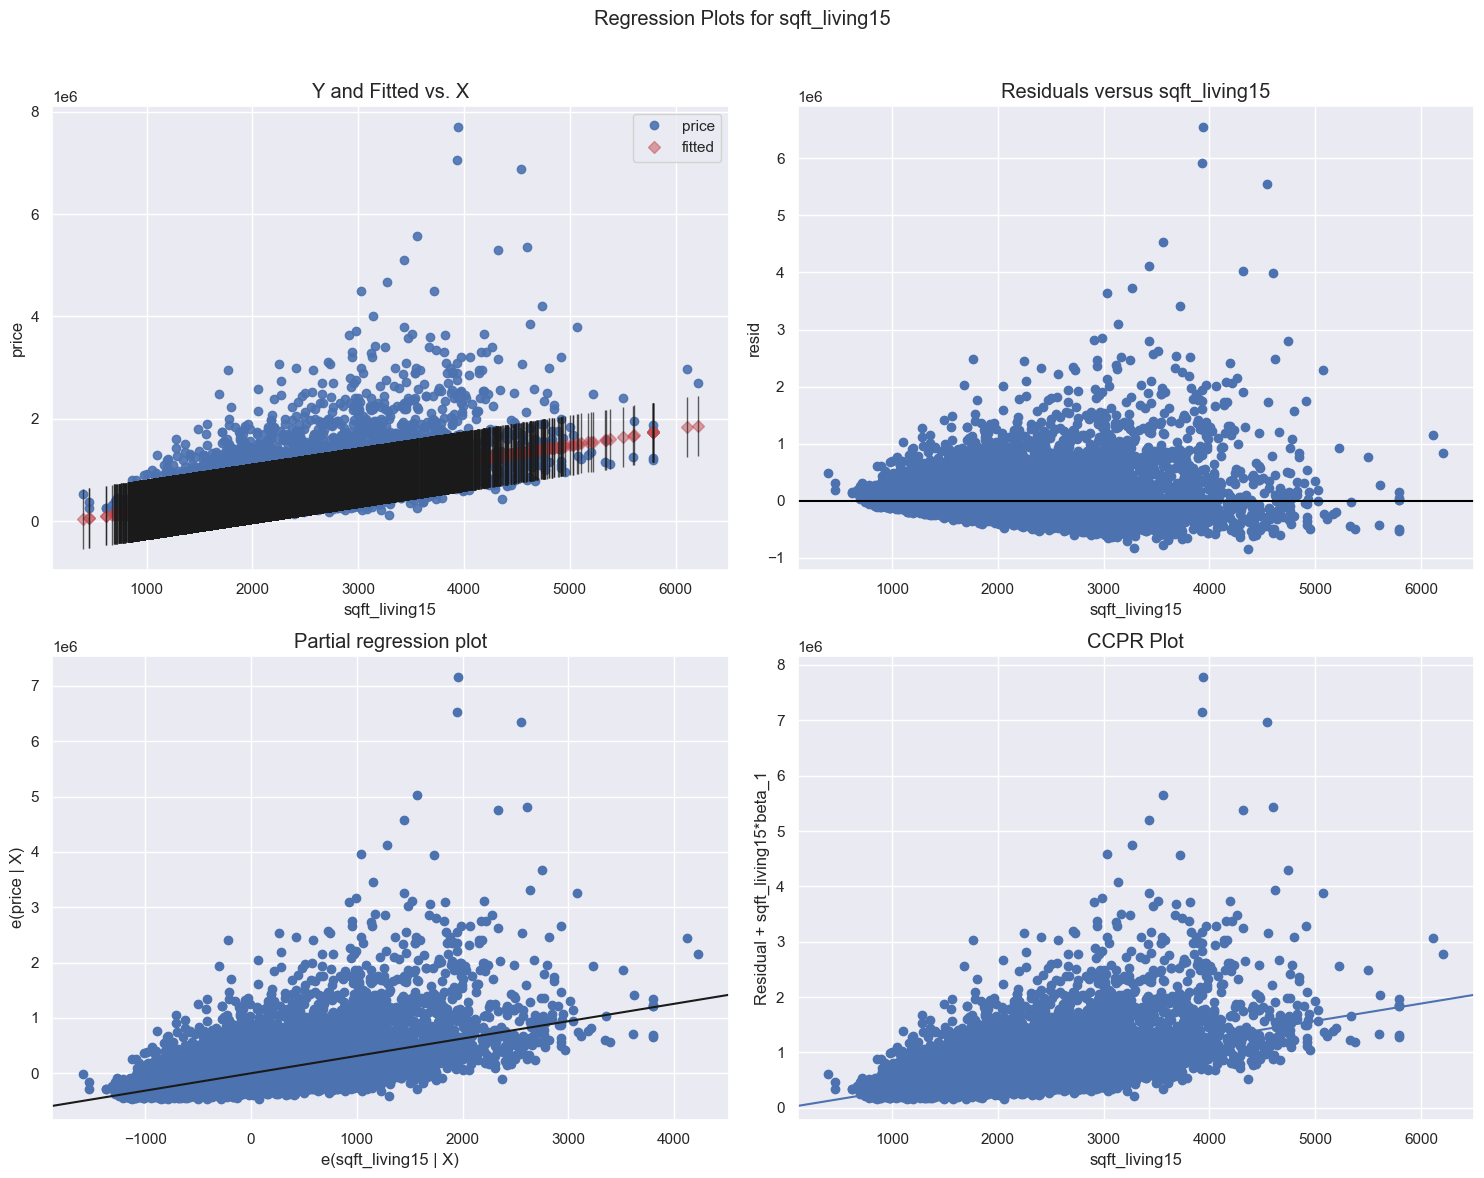

In [50]:
fig=plt.figure(figsize=(15,12))
fig=sm.graphics.plot_regress_exog(model,'sqft_living15',fig=fig)

In [55]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats

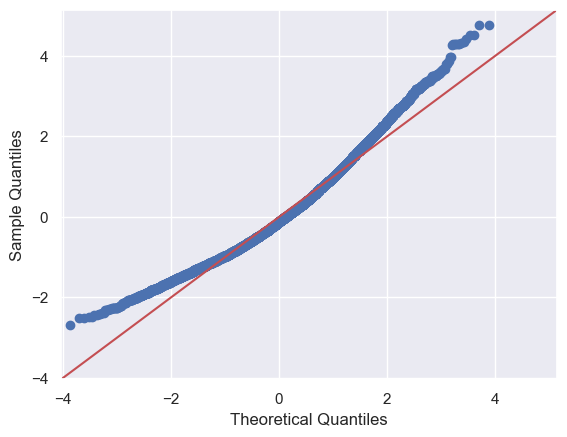

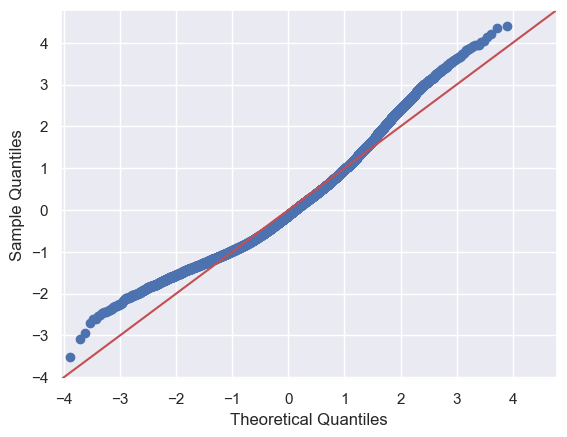

In [56]:
# we use normal Q-Q plots to visually assess how well our residuals match the aspects of distribution 
f='price~grade'
f2='price~sqft_living15'
model=smf.ols(formula=f,data=new_data).fit()
model2=smf.ols(formula=f2,data=new_data).fit()
resid1=model.resid
resid2=model2.resid
fig=sm.graphics.qqplot(resid1,dist=stats.norm,line='45',fit=True)
fig=sm.graphics.qqplot(resid2,dist=stats.norm,line='45',fit=True)

In [57]:
model.pvalues

Intercept    0.0
grade        0.0
dtype: float64

In [58]:
model2.pvalues

Intercept        6.339933e-159
sqft_living15     0.000000e+00
dtype: float64

In [59]:
# For categorical variables of continuous values, the scatter plots generate a pretty homogenous 'cloud' unlike 
# those that generate vertical lines for discrete values.

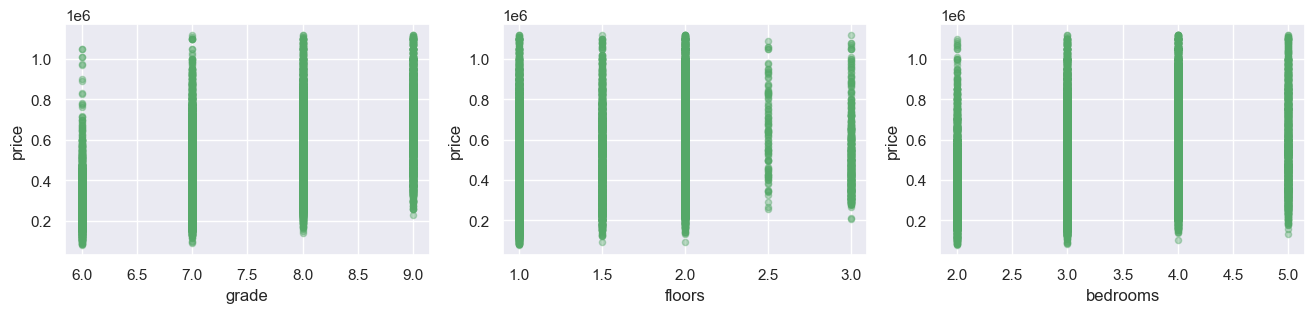

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
fig,axes= plt.subplots(nrows=1,ncols=3,figsize=(16,3))
for xcol, ax in zip(['grade','floors','bedrooms'],axes):
    new_data.plot(kind='scatter',x=xcol,y='price',ax=ax,alpha=0.4,color='g')

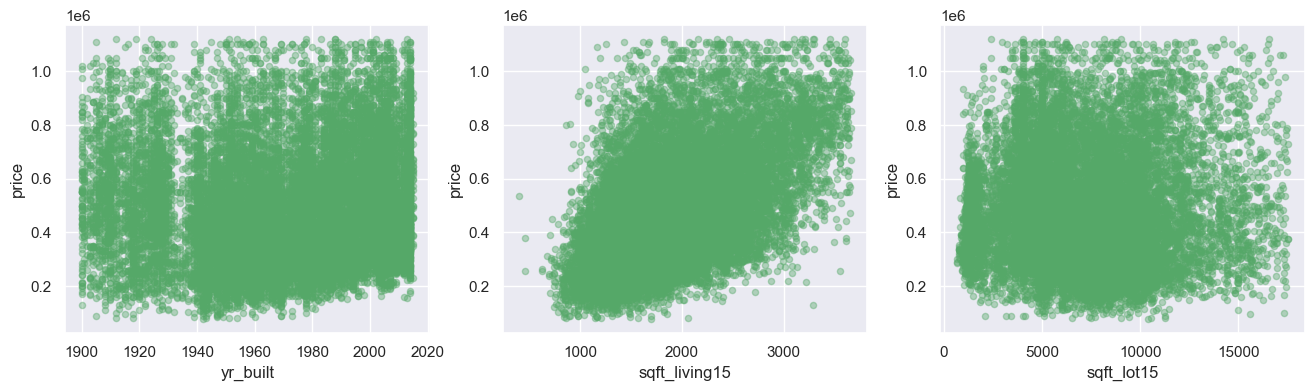

In [61]:
fig,axes= plt.subplots(nrows=1,ncols=3,figsize=(16,4))
for xcol, ax in zip(['yr_built','sqft_living15','sqft_lot15'],axes):
    new_data.plot(kind='scatter',x=xcol,y='price',ax=ax,alpha=0.4,color='g')

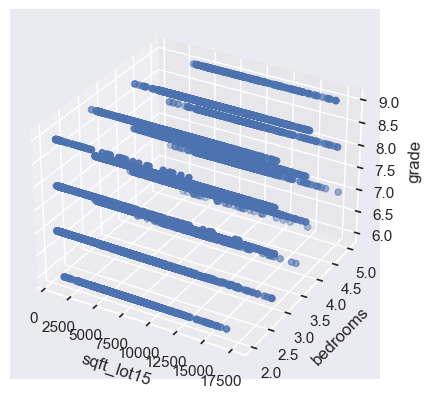

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select 3 columns
X = new_data[['sqft_lot15', 'bedrooms', 'grade']]

# Calculate VIF
#vif = new_data
#vif["variables"] = X.columns
#vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Plot results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['sqft_lot15'], X['bedrooms'], X['grade'])
ax.set_xlabel('sqft_lot15')
ax.set_ylabel('bedrooms')
ax.set_zlabel('grade')
plt.show()

In [63]:
# Select categorical columns
cat_cols = ['price', 'bedrooms']

# Transform categorical columns using one-hot encoding
data = pd.get_dummies(new_data, columns=cat_cols)

# Print results
print(data.head())

   floors  view  grade  yr_built  yr_renovated  sqft_living15  sqft_lot15  \
0     1.0   NaN    7.0      1955           NaN         1340.0      5650.0   
1     2.0   NaN    7.0      1951           NaN         1690.0      7639.0   
2     1.0   NaN    6.0      1933           NaN         2720.0      8062.0   
3     1.0   NaN    7.0      1965           NaN         1360.0      5000.0   
4     1.0   NaN    8.0      1987           NaN         1800.0      7503.0   

   price_78000.0  price_80000.0  price_81000.0  ...  price_1070000.0  \
0              0              0              0  ...                0   
1              0              0              0  ...                0   
2              0              0              0  ...                0   
3              0              0              0  ...                0   
4              0              0              0  ...                0   

   price_1080000.0  price_1090000.0  price_1100000.0  price_1110000.0  \
0                0             

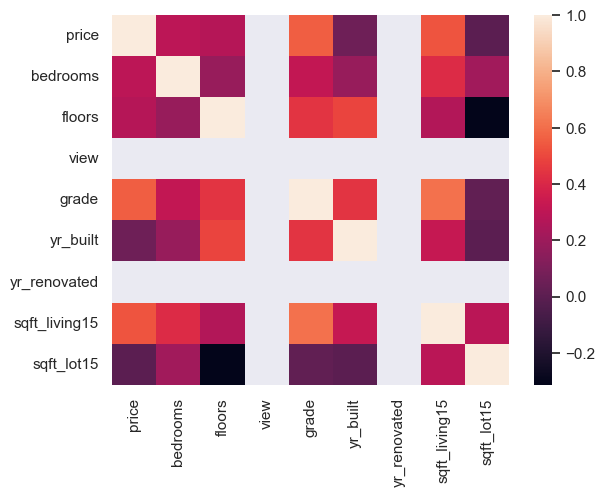

In [64]:
# Plot results
sns.heatmap(new_data.corr())
plt.show()

In [65]:
# feature scaling and normalization help to manage the difference in magnitude in the datasets
### log transformation below is useful tool in data that does not follow a normal distribution. 

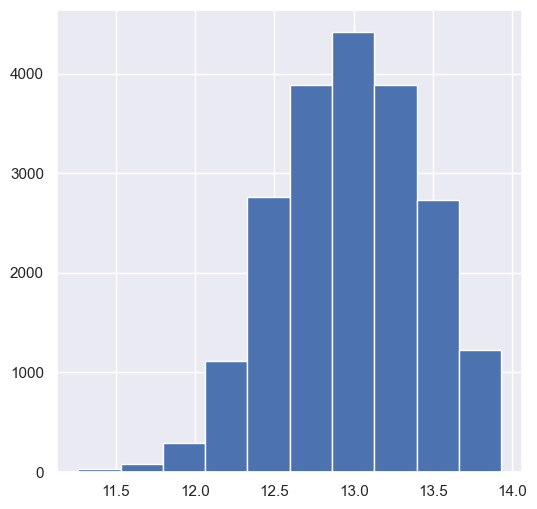

In [66]:
import numpy as np
import pandas as pd
data_log=new_data#pd.Dataframe([])
data_log['logpr']=np.log(new_data['price'])
data_log['logpr'].hist(figsize=[6,6]);

### Model validation

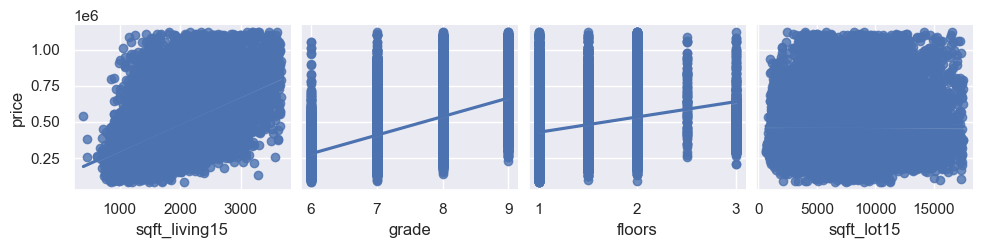

In [67]:
  ## Visualisation to judge the variables which have a linear relationship with price 
sns.pairplot(new_data,x_vars=['sqft_living15','grade','floors','sqft_lot15'],y_vars='price',kind='reg');

In [68]:
from sklearn.model_selection import train_test_split

train,test=train_test_split(new_data.fillna(0),random_state=42,test_size=0.2)

In [69]:
train

,price,bedrooms,floors,view,grade,yr_built,yr_renovated,sqft_living15,sqft_lot15,logpr
7923,250000.0,3.0,1.0,0.0,7.0,1984,0.0,1500.0,7560.0,12.429216
14476,250000.0,4.0,1.5,0.0,7.0,1920,0.0,1320.0,6431.0,12.429216
21210,235000.0,0.0,2.0,0.0,8.0,2007,0.0,1360.0,1730.0,12.367341
2154,410000.0,0.0,1.0,0.0,7.0,1911,0.0,1230.0,5750.0,12.923912
5675,0.0,4.0,1.0,0.0,9.0,2003,0.0,1940.0,10189.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
11290,345000.0,3.0,1.0,0.0,7.0,1952,0.0,1330.0,6768.0,12.751300
11971,319950.0,4.0,1.0,0.0,7.0,1976,0.0,1790.0,8086.0,12.675920
5392,200000.0,3.0,1.0,0.0,7.0,1955,0.0,1110.0,8108.0,12.206073
860,245000.0,0.0,1.0,0.0,0.0,1963,0.0,1170.0,15000.0,12.409013


In [70]:
test

,price,bedrooms,floors,view,grade,yr_built,yr_renovated,sqft_living15,sqft_lot15,logpr
16738,476000.0,3.0,1.0,0.0,7.0,1977,0.0,2040.0,12220.0,13.073173
20840,399500.0,4.0,2.0,0.0,8.0,2014,0.0,1260.0,11541.0,12.897969
2150,605000.0,3.0,1.0,0.0,8.0,1973,0.0,1880.0,7580.0,13.312984
20663,795000.0,4.0,2.0,0.0,9.0,2007,0.0,3400.0,3663.0,13.586097
5379,638000.0,3.0,2.0,0.0,9.0,2003,0.0,2170.0,5000.0,13.366094
...,...,...,...,...,...,...,...,...,...,...
8970,540000.0,2.0,1.0,0.0,7.0,1959,0.0,1780.0,4500.0,13.199324
7206,304000.0,2.0,2.0,0.0,7.0,2003,0.0,950.0,1280.0,12.624783
10136,245000.0,3.0,1.5,0.0,6.0,1907,0.0,1680.0,5850.0,12.409013
20320,356250.0,3.0,2.0,0.0,9.0,2014,0.0,2648.0,4500.0,12.783388


In [71]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [72]:
def handle_nan_inf(new_data):

    # Replace infinite values with NaN
    df.replace([np.inf, -np.inf], np.nan, inplace=True)

      # Replace NaN values with 0
    df.fillna(0, inplace=True)

    return df

In [73]:

newer_data=new_data.fillna(0)
y=newer_data[['price']]
x=newer_data.drop(['price','view','yr_renovated','logpr'], axis=1)

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [74]:
x_train

,bedrooms,floors,grade,yr_built,sqft_living15,sqft_lot15
10757,3.0,2.0,0.0,1987,2680.0,10071.0
20858,4.0,2.0,0.0,2011,0.0,0.0
2717,4.0,2.0,8.0,1993,2130.0,9920.0
12447,0.0,2.0,8.0,1942,0.0,12620.0
5987,3.0,1.0,7.0,1954,2020.0,11069.0
...,...,...,...,...,...,...
16733,5.0,1.0,8.0,1957,1770.0,5000.0
18839,3.0,1.0,8.0,1976,2050.0,10488.0
1721,3.0,1.0,7.0,1966,1320.0,0.0
1413,4.0,1.5,7.0,1944,1430.0,6825.0


In [75]:
y_train

,price
10757,720000.0
20858,775000.0
2717,354450.0
12447,0.0
5987,519000.0
...,...
16733,630000.0
18839,440000.0
1721,300000.0
1413,445000.0


In [76]:
print(len(x_train), len(x_test), len(y_train), len(y_test))

17259 4315 17259 4315


In [77]:
# to avoid data leakage, we do our data preparation after the split

In [78]:
# log transformation
from sklearn.preprocessing import FunctionTransformer
import numpy as np

log_transformer=FunctionTransformer(np.log,validate=True)

log_columns=['bedrooms','floors','yr_built']

new_log_columns=['log_bedrooms','log_floors','log_yr_built']


  # convert the training column to a Dataframe
x_train_log=pd.DataFrame(log_transformer.fit_transform(x_train[log_columns]),columns=new_log_columns,index=x_train.index)

  # Replacing training columns with transformed columns.
x_train=pd.concat([x_train.drop(log_columns,axis=1),x_train_log],axis=1)

  # To transform the test column into a Dataframe
x_test_log=pd.DataFrame(log_transformer.transform(x_test[log_columns]),columns=new_log_columns,index=x_test.index)

In [79]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(handle_unknown='ignore',sparse=False)
cat_columns=['grade','sqft_living15','sqft_lot15']
ohe.fit(x_train[cat_columns])
new_cat_columns=ohe.get_feature_names(input_features=cat_columns)
  # for training set
x_train_ohe=pd.DataFrame(ohe.fit_transform(x_train[cat_columns]),columns=new_cat_columns,index=x_train.index)
x_train=pd.concat([x_train.drop(cat_columns,axis=1),x_train_ohe],axis=1)
x_train

,log_bedrooms,log_floors,log_yr_built,grade_0.0,grade_6.0,grade_7.0,grade_8.0,grade_9.0,sqft_living15_0.0,sqft_living15_399.0,...,sqft_lot15_17420.0,sqft_lot15_17424.0,sqft_lot15_17425.0,sqft_lot15_17449.0,sqft_lot15_17474.0,sqft_lot15_17494.0,sqft_lot15_17511.0,sqft_lot15_17539.0,sqft_lot15_17550.0,sqft_lot15_17559.0
10757,1.098612,0.693147,7.594381,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20858,1.386294,0.693147,7.606387,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2717,1.386294,0.693147,7.597396,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12447,-inf,0.693147,7.571474,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5987,1.098612,0.000000,7.577634,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16733,1.609438,0.000000,7.579168,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18839,1.098612,0.000000,7.588830,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1721,1.098612,0.000000,7.583756,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1413,1.386294,0.405465,7.572503,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
  # for the testing set
x_test_ohe=pd.DataFrame(ohe.transform(x_test[cat_columns]),columns=new_cat_columns,index=x_test.index)
x_test=pd.concat([x_test.drop(cat_columns,axis=1),x_test_ohe],axis=1)
x_test

,bedrooms,floors,yr_built,grade_0.0,grade_6.0,grade_7.0,grade_8.0,grade_9.0,sqft_living15_0.0,sqft_living15_399.0,...,sqft_lot15_17420.0,sqft_lot15_17424.0,sqft_lot15_17425.0,sqft_lot15_17449.0,sqft_lot15_17474.0,sqft_lot15_17494.0,sqft_lot15_17511.0,sqft_lot15_17539.0,sqft_lot15_17550.0,sqft_lot15_17559.0
10993,3.0,2.0,1987,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9234,2.0,2.0,2005,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
359,3.0,2.0,2000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7056,5.0,1.5,1930,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1162,5.0,2.0,1999,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20282,3.0,2.0,2010,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12517,2.0,1.0,1979,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20295,3.0,3.0,2015,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12854,3.0,1.0,1974,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [82]:
x_train.shape

(17259, 6805)

In [83]:
x_test.shape

(4315, 6805)

In [84]:
y_train.shape

(17259, 1)

In [85]:
y_test.shape

(4315, 1)

In [ ]:
  # Having preprocessed all the columns, you can fit a Linear regression model
from sklearn.linear_model import LinearRegression

# Replace NaN and infinity values with 0 and very large numbers
x_train = np.nan_to_num(x_train, nan=0.0, posinf=1e9, neginf=-1e9)
y_train = np.nan_to_num(y_train, nan=0.0, posinf=1e9, neginf=-1e9)

# Reshape your input data
#x_train = x_train.reshape(-1, 1)
#y_train = y_train.reshape(-1, 1)

if x_train.shape[0] != y_train.shape[0]:
    raise ValueError("Number of samples in x_train and y_train must be equal")

linreg=LinearRegression()
linreg.fit(x_train,y_train)

# Get the R-squared value of your model
r_squared = linreg.score(x_train, y_train)
#r_squared

y_hat_train=linreg.predict(x_train)
y_hat_test=linreg.predict(x_test)


In [ ]:
  # calculate the MSE for training and test sets
train_residuals=y_hat_train-y_train
test_residuals=y_hat_test-y_test

In [ ]:
  # Using sklearns Mean_Squared_error() function
from sklearn.metrics import mean_squared_error
train_mse=mean_squared_error(y_train,y_hat_train)
test_mse=mean_squared_error(y_test,y_hat_test)
print('Train MSE:',train_mse)
print('Test MSE:',test_mse)

In [ ]:
### check for underfitting which is a case of the difference between the train and test MSE is not big
    ## unlike for overfitting where there's is a big difference between the train and test MSE.

In [ ]:
  # Overfitting model
from sklearn.tree import DecisionTreeRegressor
other_model= DecisionTreeRegressor(random_state=42)
other_model.fit(x_train,y_train)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_boston
from sklearn.tree import plot_tree

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(x, y)

plot_tree(tree_reg)

In [ ]:
other_train_mse=mean_squared_error(y_train,other_model.predict(x_train))
other_test_mse=mean_squared_error(y_test,other_model.predict(x_test))
print('Train MSE :', other_train_mse)
print('Test MSE :', other_test_mse)

In [ ]:
## the K_Fold cross validation expands on the idea of training and test splits by splitting the entire dataset 
  # into k equal sections of data

In [ ]:
from sklearn.model_selection import cross_validate
cross_validate(linreg,x,y)

In [ ]:
cross_validate(linreg,x,y,scoring=["r2", "neg_mean_squared_error"])

In [ ]:
# To compare the train vs test scores to look for overfitting
cross_validate(linreg, x, y, return_train_score=True)

In [ ]:

# Define colors
colors = ["blue", "orange"]

cross_val_results = cross_validate(linreg, x, y, cv=20,scoring="neg_mean_squared_error", return_train_score=True)
# Negative signs in front to convert back to MSE from -MSE
train_avg = -cross_val_results["train_score"].mean()
test_avg = -cross_val_results["test_score"].mean()

# Define labels
labels = ["Train", "Test"]

fig, ax = plt.subplots()
ax.bar(labels, [train_avg, test_avg], color=colors)
ax.set_ylabel("MSE")
fig.suptitle("Average Cross-Validation Scores")

plt.show()

### Recommendations

In [98]:
## some of the aspects that had a great impact on the prices of the houses included 'sqft_living15','grade','bedrooms','floors'
## on the other hand the 'yr_renovated' column had an impact on the prices though not that much directly as the other aspects